<a href="https://colab.research.google.com/github/skull8944/ai/blob/main/0519.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import tensorflow as tf
tf.__version__
print("GPU Available:", tf.test.is_gpu_available())

GPU Available: True


In [93]:
!nvidia-smi

Wed May 19 11:51:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    30W /  70W |    224MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [110]:
A = tf.constant([[1,2],[3,4]])
B = tf.constant([[5,6],[7,8]])
C = tf.matmul(A,B)

In [111]:
print(C)

tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


In [112]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
print('x_train = ' + str(x_train.shape))
print('y_train = ' + str(y_train.shape))

x_train = (60000, 28, 28)
y_train = (60000,)


In [113]:
def printMatrixE(a):
  rows = a.shape[0]
  cols = a.shape[1]
  for i in range(0,rows):
    str1 = ""
    for j in range(0,cols):
      str1 = str1+("%3.0f" % a[i,j])
    print(str1)
  print("")
for i in range(0,10):
  printMatrixE(x_train[i]) #顯示第n筆圖
  print('y_train[' + str(i) + '] = ' + str(y_train[i]))

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [114]:
import matplotlib.pyplot as plt

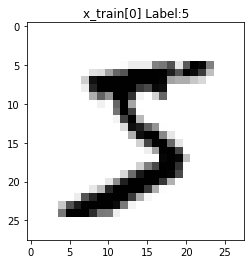

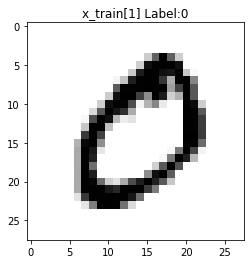

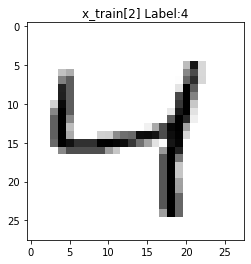

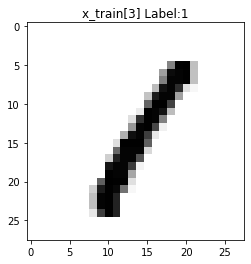

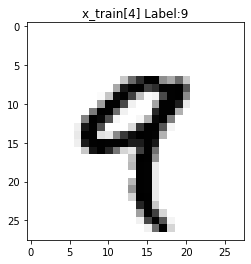

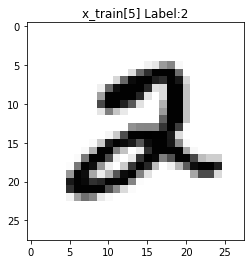

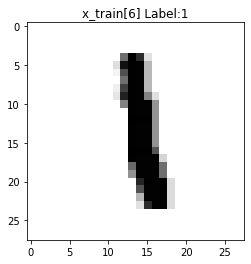

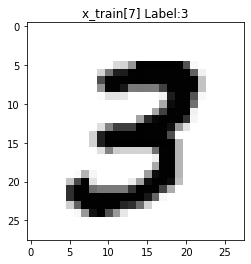

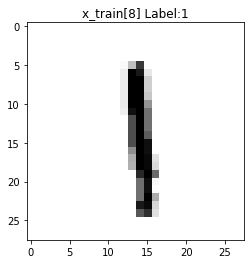

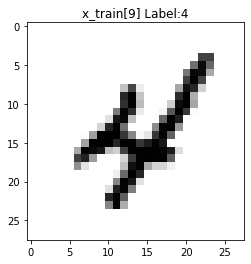

In [115]:
for num in range(0,10):
  plt.title('x_train[%d] Label:%d' %(num,y_train[num]))
  plt.imshow(x_train[num], cmap=plt.get_cmap('gray_r'))
  plt.show()

In [116]:
import numpy as np

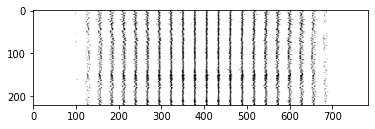

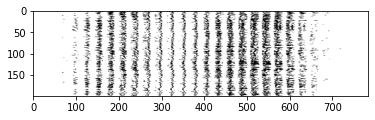

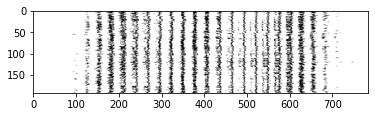

In [117]:
def display_mult_flat(start, stop, label):
  images = x_train[start].reshape([1,784])
  for i in range(start+1,stop):
    label2 = int(y_train[i])
    if label == label2:
      images = np.concatenate((images, x_train[i].reshape([1,28*28])))
  plt.imshow(images, cmap=plt.get_cmap('gray_r'))
  plt.show()
display_mult_flat(0,2000,1)
display_mult_flat(0,2000,2)
display_mult_flat(0,2000,3)

In [118]:
from sklearn.datasets import load_digits

In [119]:
num_classes = 10 #影像類別數目
img_rows, img_cols = 28, 28

In [120]:
print('x_train before reshape:', x_train.shape)
dim = img_rows * img_cols * 1
x_train = x_train.reshape(x_train.shape[0], dim)
x_test = x_test.reshape(x_test.shape[0], dim)
print('x_train after reshape:', x_train.shape)

x_train before reshape: (60000, 28, 28)
x_train after reshape: (60000, 784)


In [122]:
#標準化輸入資料
print('x_train before div 255:', x_train[0][180:195])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train before div 255', x_train[0][180:195])

x_train before div 255: [0.6666667  0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.88235295 0.6745098  0.99215686 0.9490196  0.7647059  0.2509804
 0.         0.         0.        ]
x_train before div 255 [0.00261438 0.00389081 0.00389081 0.00389081 0.00389081 0.00389081
 0.00346021 0.00264514 0.00389081 0.00372165 0.00299885 0.00098424
 0.         0.         0.        ]


In [123]:
print('y_train shape:', y_train.shape)
print(y_train[:10])
category=10
y_train2 = tf.keras.utils.to_categorical(y_train, category)
y_test2 = tf.keras.utils.to_categorical(y_test, category)
print("y_train2 to_categorical shape = ", y_train2.shape)
print(y_train2[:10])

y_train shape: (60000,)
[5 0 4 1 9 2 1 3 1 4]
y_train2 to_categorical shape =  (60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [127]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=10,
     activation=tf.nn.relu,
     input_dim=dim ))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=category,activation=tf.nn.softmax))
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
   loss = tf.keras.losses.categorical_crossentropy,
   metrics = ['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [128]:
#訓練模型
history=model.fit(x_train,y_train2,
        batch_size=1000,
        epochs=200,
        verbose=1)

Epoch 1/200
60/60 [==============================] - 3s 3ms/step - loss: 2.3000 - accuracy: 0.1375
Epoch 2/200
60/60 [==============================] - 0s 4ms/step - loss: 2.2822 - accuracy: 0.2037
Epoch 3/200
60/60 [==============================] - 0s 4ms/step - loss: 2.2346 - accuracy: 0.3640
Epoch 4/200
60/60 [==============================] - 0s 4ms/step - loss: 2.1368 - accuracy: 0.4190
Epoch 5/200
60/60 [==============================] - 0s 3ms/step - loss: 1.9952 - accuracy: 0.4316
Epoch 6/200
60/60 [==============================] - 0s 3ms/step - loss: 1.8398 - accuracy: 0.4537
Epoch 7/200
60/60 [==============================] - 0s 3ms/step - loss: 1.6879 - accuracy: 0.5049
Epoch 8/200
60/60 [==============================] - 0s 4ms/step - loss: 1.5483 - accuracy: 0.5500
Epoch 9/200
60/60 [==============================] - 0s 4ms/step - loss: 1.4141 - accuracy: 0.5839
Epoch 10/200
60/60 [==============================] - 0s 4ms/step - loss: 1.3000 - accuracy: 0.6187
Epoch 11/

In [130]:
score = model.evaluate(x_test,y_test2,batch_size=128)
print("score:",score)
predict=model.predict(x_test)
print("Ans:",np.argmax(predict[0]),np.argmax(predict[1]),np.argmax(predict[2]),np.argmax(predict[3]))
predict2 = model.predict_classes(x_test[:10])
print("predict_classes:",predict2[:10])
print("y_test",y_test[:10])

79/79 [==============================] - 0s 2ms/step - loss: 0.2844 - accuracy: 0.9189
score: [0.28435584902763367, 0.9189000129699707]
Ans: 7 2 1 0
predict_classes: [7 2 1 0 4 1 4 9 4 9]
y_test [7 2 1 0 4 1 4 9 5 9]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
